In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Reading the dataframes from 2018 and 2019
df_18 = pd.read_csv('delays_2018.csv')
df_19 = pd.read_csv('delays_2019.csv')

# Merging 2018 and 2019 to a single Dataframe using .concat
df = pd.concat([df_18, df_19], ignore_index=True)

print('Total Rows: ' + str(len(df_18) + len(df_19)))

Total Rows: 41177


# Cleaning the data

In [5]:
# Changing the date column in df to date format YYYY-M
df['date'] = pd.to_datetime(df['date'], format='%Y-%m')

# Remove rows containing invalid data.
df = df[(df['date'] >= '2018-01') & (df['date'] <= '2019-12') & (df['arr_flights'].notnull()) & (df['airport'] == 'MCO')
              & (df['carrier'].notnull()) & (df['carrier_name'].notnull()) 
              & (df['airport'].notnull()) & (df['airport_name'].notnull())]

print(str(len(df)))

231


# Visualizing the data

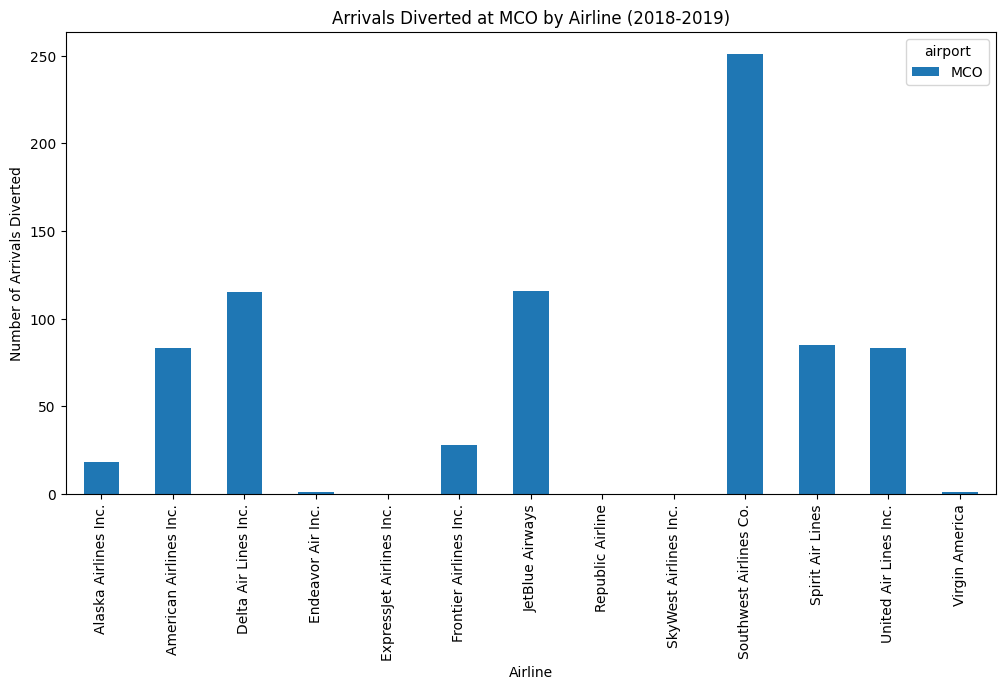

In [6]:
# Arrivals diverted at MCO, by airline, between 2018 and 2019
MCOdivertedArrivals = pd.crosstab(df['carrier_name'], df['airport'], values=df['arr_diverted'], aggfunc='sum').fillna('')

MCOdivertedArrivals.plot(kind='bar', figsize=(12, 6))
plt.title('Arrivals Diverted at MCO by Airline (2018-2019)')
plt.xlabel('Airline')
plt.ylabel('Number of Arrivals Diverted')
plt.xticks(rotation=90)  

plt.show()

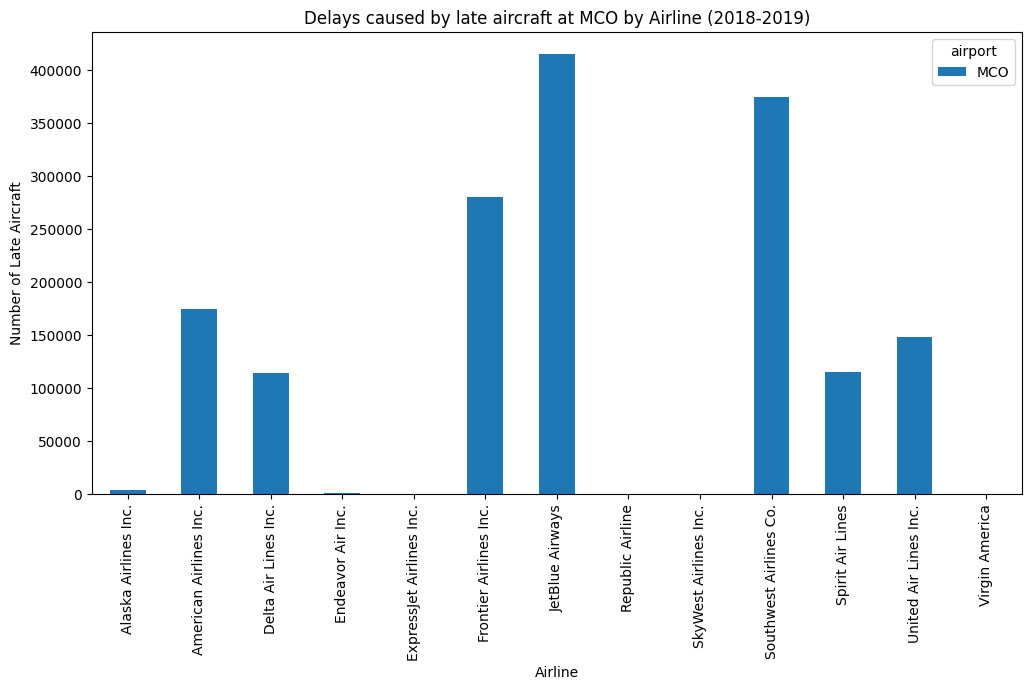

In [7]:
# Delays caused by late aircraft at MCO, by airline, between 2018 and 2019
MCOlateAircraft = pd.crosstab(df['carrier_name'], df['airport'], values=df['late_aircraft_delay'], aggfunc='sum').fillna('')

MCOlateAircraft.plot(kind='bar', figsize=(12, 6))
plt.title('Delays caused by late aircraft at MCO by Airline (2018-2019)')
plt.xlabel('Airline')
plt.ylabel('Number of Late Aircraft')
plt.xticks(rotation=90)  

plt.show()

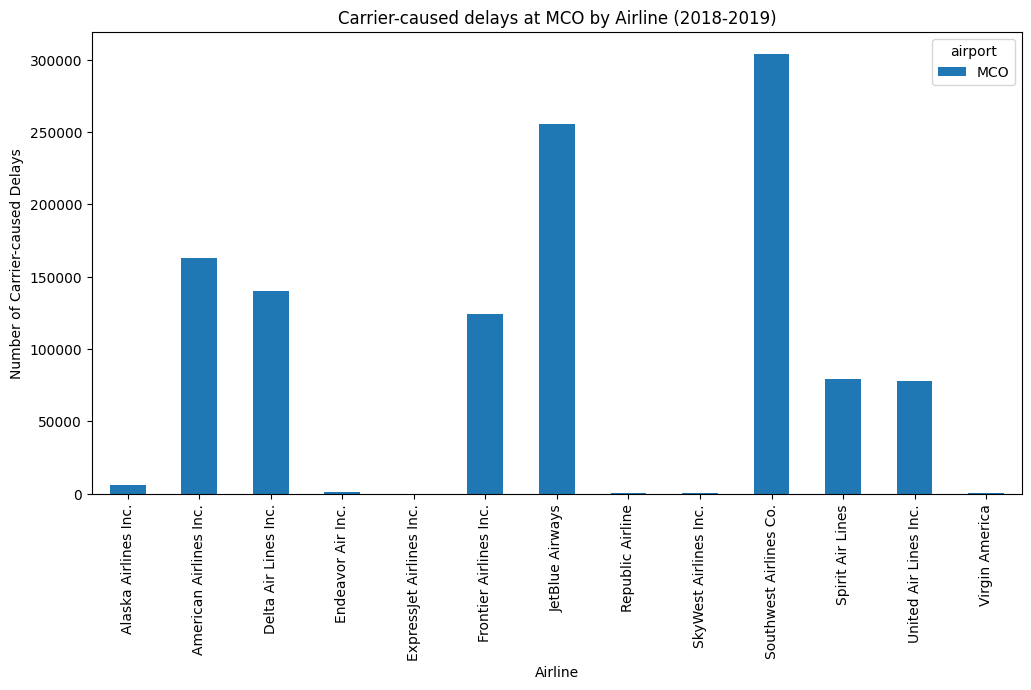

In [9]:
# Carrier-caused delays at MCO, by airline, between 2018 and 2019
MCOcarrierDelay = pd.crosstab(df['carrier_name'], df['airport'], values=df['carrier_delay'], aggfunc='sum').fillna('')

MCOcarrierDelay.plot(kind='bar', figsize=(12, 6))
plt.title('Carrier-caused delays at MCO by Airline (2018-2019)')
plt.xlabel('Airline')
plt.ylabel('Number of Carrier-caused Delays')
plt.xticks(rotation=90)  

plt.show()

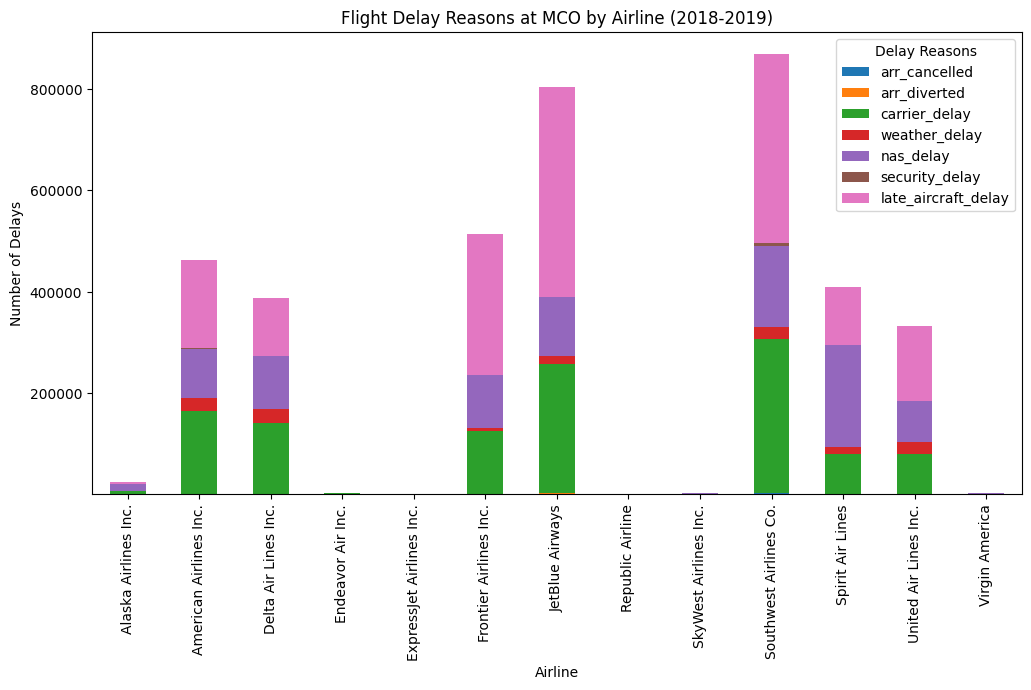

In [8]:
# All reasons for delay at MCO
delay_reasons = df.groupby(['carrier_name', 'carrier'])[['arr_cancelled', 'arr_diverted', 'carrier_delay',	'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']].sum().reset_index()

delay_reasons.set_index('carrier_name').plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Flight Delay Reasons at MCO by Airline (2018-2019)')
plt.xlabel('Airline')
plt.ylabel('Number of Delays')
plt.xticks(rotation=90)
plt.legend(title='Delay Reasons', loc='upper right')
plt.show()

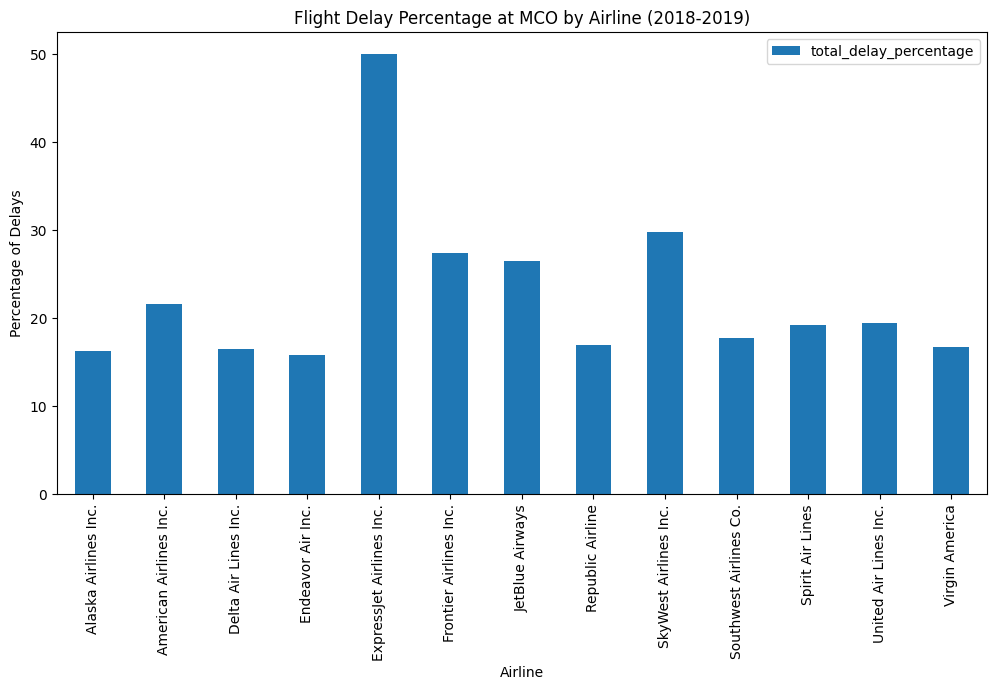

In [9]:
# Delays as a percentage of all arriving flights at MCO between 2018-2019, by airline
total_delays = df.groupby(['carrier_name', 'carrier'])[['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']].sum().reset_index()
total_arrivals = df.groupby(['carrier_name', 'carrier'])['arr_flights'].sum().reset_index()
merged_delays_arrivals = pd.merge(total_arrivals, total_delays, on=['carrier_name', 'carrier'])
merged_delays_arrivals['total_delay_percentage'] = (merged_delays_arrivals['carrier_ct'] + merged_delays_arrivals['weather_ct'] + merged_delays_arrivals['nas_ct'] + merged_delays_arrivals['security_ct'] + merged_delays_arrivals['late_aircraft_ct']) / merged_delays_arrivals['arr_flights'] * 100

merged_delays_arrivals.set_index('carrier_name').plot(kind='bar', y='total_delay_percentage', figsize=(12, 6))
plt.title('Flight Delay Percentage at MCO by Airline (2018-2019)')
plt.xlabel('Airline')
plt.ylabel('Percentage of Delays')
plt.xticks(rotation=90)
plt.show()

# Takeaways
- Southwest Airlines may appear to hold champion for most amount of flight delays as a result of carrier, but Expressjet Airlines Inc. holds the most amount of delays in context of total amount of arrivals per airline.
- Spirit Airlines, which holds a reputation for being late, has a similar delay rate as the leading airline carriers at MCO, such as Delta, AA, and United.